In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

In [3]:
import sys
import warnings
import seaborn as sns
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `scripts/stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [4]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
print(f'rows : {strava.shape[0]}  columns : {strava.shape[1]}')
strava.head()

rows : 268  columns : 10


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [5]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
print(print(f'rows : {cheetah.shape[0]}  columns : {cheetah.shape[1]}'))
cheetah.head()

rows : 251  columns : 362
None


,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Combine these two data frames using join (inner join)
* first both dataframe have different time zone
* converting dataframe index using tz_localize and tz_convert to UTC\n
* and perform merge function using the index and make new dataframe

In [6]:
#join dataframes using datetime index 
#changing dataframe timezone using tz_localize for strava dataframe and tz_change for cheetah dataframe
strava.index = strava.index.tz_localize('utc')
cheetah.index = cheetah.index.tz_convert('utc')
# datetimeIndex datatype converted to datetime64[ns,UTC]
strava.index[:3],cheetah.index[:3]

(DatetimeIndex(['2018-01-02 20:47:51+00:00', '2018-01-04 01:36:53+00:00',
                '2018-01-04 02:56:00+00:00'],
               dtype='datetime64[ns, UTC]', name='date', freq=None),
 DatetimeIndex(['2018-01-27 19:39:49+00:00', '2018-01-27 20:01:32+00:00',
                '2018-01-31 21:13:34+00:00'],
               dtype='datetime64[ns, UTC]', freq=None))

In [7]:
#combine two data frames which hase same time value using merge function with innerjoin
new_df = pd.merge(strava,cheetah,left_index=True,right_index=True,how='inner')
print(f'new data frame rows : {new_df.shape[0]}  columns : {new_df.shape[1]}')
new_df.head()

new data frame rows : 243  columns : 372


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


### checking join function using total columns 

In [8]:
assert len(strava.columns)+len(cheetah.columns) == len(new_df.columns) , 'didn`t join well'

### 1.Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

In [9]:
print('value in device column : ',new_df.device_watts.unique())
#Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
new_df = new_df[new_df['device_watts']!=False]
print(f'rows : {new_df.shape[0]}  columns : {new_df.shape[1]}')
new_df.tail()

value in device column :  [True False nan]
rows : 209  columns : 372


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620
2019-07-27 23:55:13+00:00,109.6,15.0,114.7,True,20.2,68,280.00 m,6,59,Ride,...,0,0,0,0,0,0,0,163.001,0.608214,36.6945


* device_watt column hold data in boolean format we filter the dataframe where device_watt column value is not a False
* And check the rows which is less then the old dataframe.

### 2. Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?

* first define function of skewness and check the skewness of the particular column
* for check skewness the skewness 
    <ul><li>skewness value is 0 means normal Distributed 
    </li>
    <li>skewness value is greater than 0 means right skewed
    </li>
    <li>skewness value is less than 0 means left skewd
    </li>
    </ul>

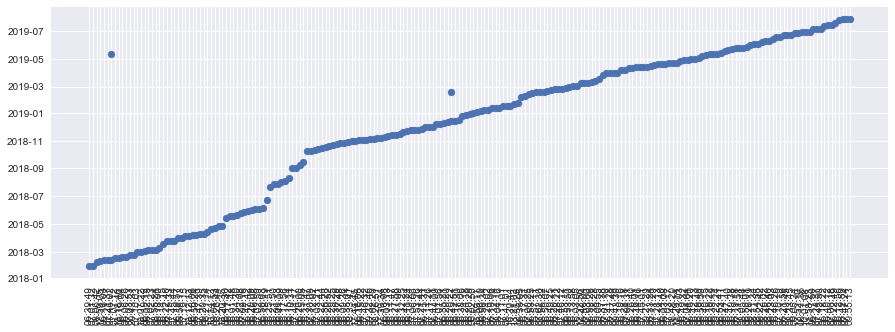

In [13]:
#time, distance, average speed, average power, TSS.
#define skewnwss function 
def find_skewness(data):
    skew = 0
    mean,std = data.mean(),data.std()
    for i in data:
        skew += (i-mean) * (i-mean) * (i-mean)
    skew /= (len(data) * std * std * std)
    return skew

#function for check normal distribution and right and left skewed
def ch_skew(skew_val):
    if skew_val > 0:
        return 'Right skewed'
    elif skew_val == 0:
        return 'Normal Distributed'
    else:
        return 'Left skewed'
        
# for time column
plt.figure(figsize=(15,5))
new_df['time'] = pd.to_datetime(new_df['time']).dt.strftime('%H:%M:%S')
plt.scatter(new_df['time'],new_df.index)
plt.xticks(rotation = 90)
plt.show()

* Time column follows the normal distribution as per scatter plot

* store column name in one list and perform loop function to generate columns graphs.
* scatter plot for time data plotting 
* distplot for all other fields.

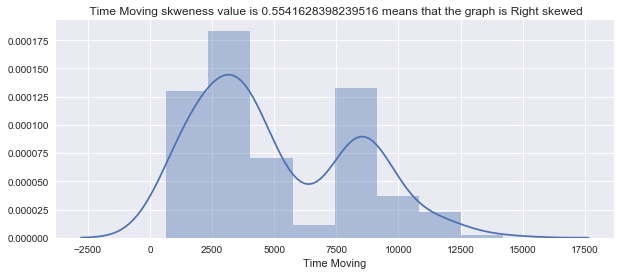

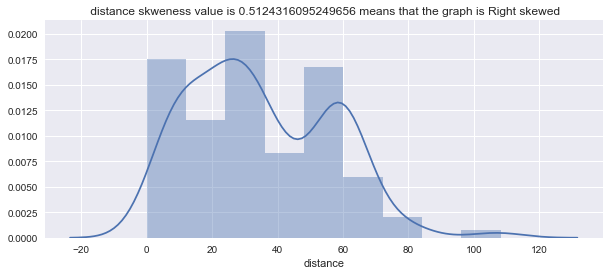

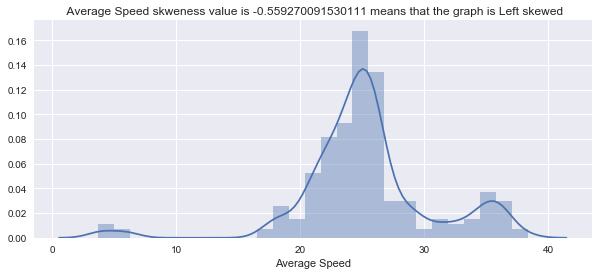

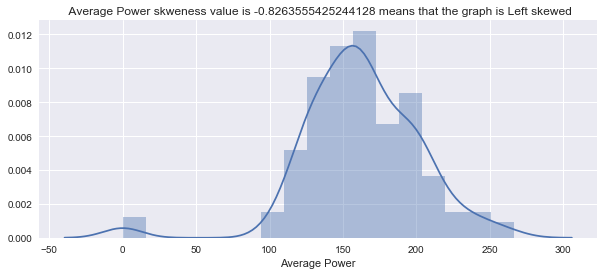

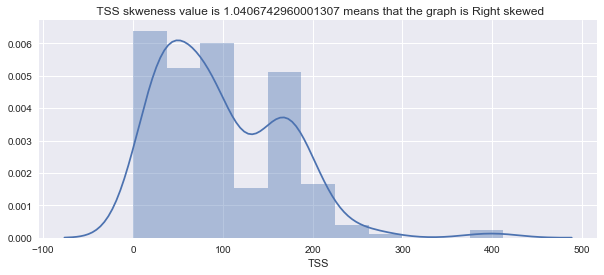

In [14]:
#plotting figure 
fig_columns = ['Time Moving','distance','Average Speed','Average Power','TSS']
for i in fig_columns:
    plt.figure(figsize=(10,4))
    sns.distplot(new_df[i])
    plt.title(f' {i} skweness value is {find_skewness(new_df[i])} means that the graph is {ch_skew(find_skewness(new_df[i]))}',fontsize=12)

###### Here positive value of skeweness show right skewed graph and negative value show left skewed graph
<B>Time Moving</B> skeweness is 0.5541628398239516 means that the graph is Right skewed<br>
<B>distance</B> skeweness is 0.5124316095249656 means that the graph is Right skewed<br>
<B>Average Speed</B> skeweness is -0.559270091530111 means that the graph is Left skewed<br>
<B>Average Power</B> skeweness is -0.8263555425244128 means that the graph is Left skewed<br>
<B>TSS</B> skeweness is 1.0406742960001307 means that the graph is Right skewed<br>

### 3.Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain

In [15]:
que3 = new_df[['Distance','Time Moving','Average Speed','Average Heart Rate','Average Power','NP','TSS','Elevation Gain']]
que3.head(2)

,Distance,Time Moving,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
2018-01-27 19:39:49+00:00,7.5974,1053,26.0234,120.539,153.283,222.856,20.2257,77.8
2018-01-27 20:01:32+00:00,38.6279,4062,34.4380,146.541,186.599,245.365,94.5787,362.2


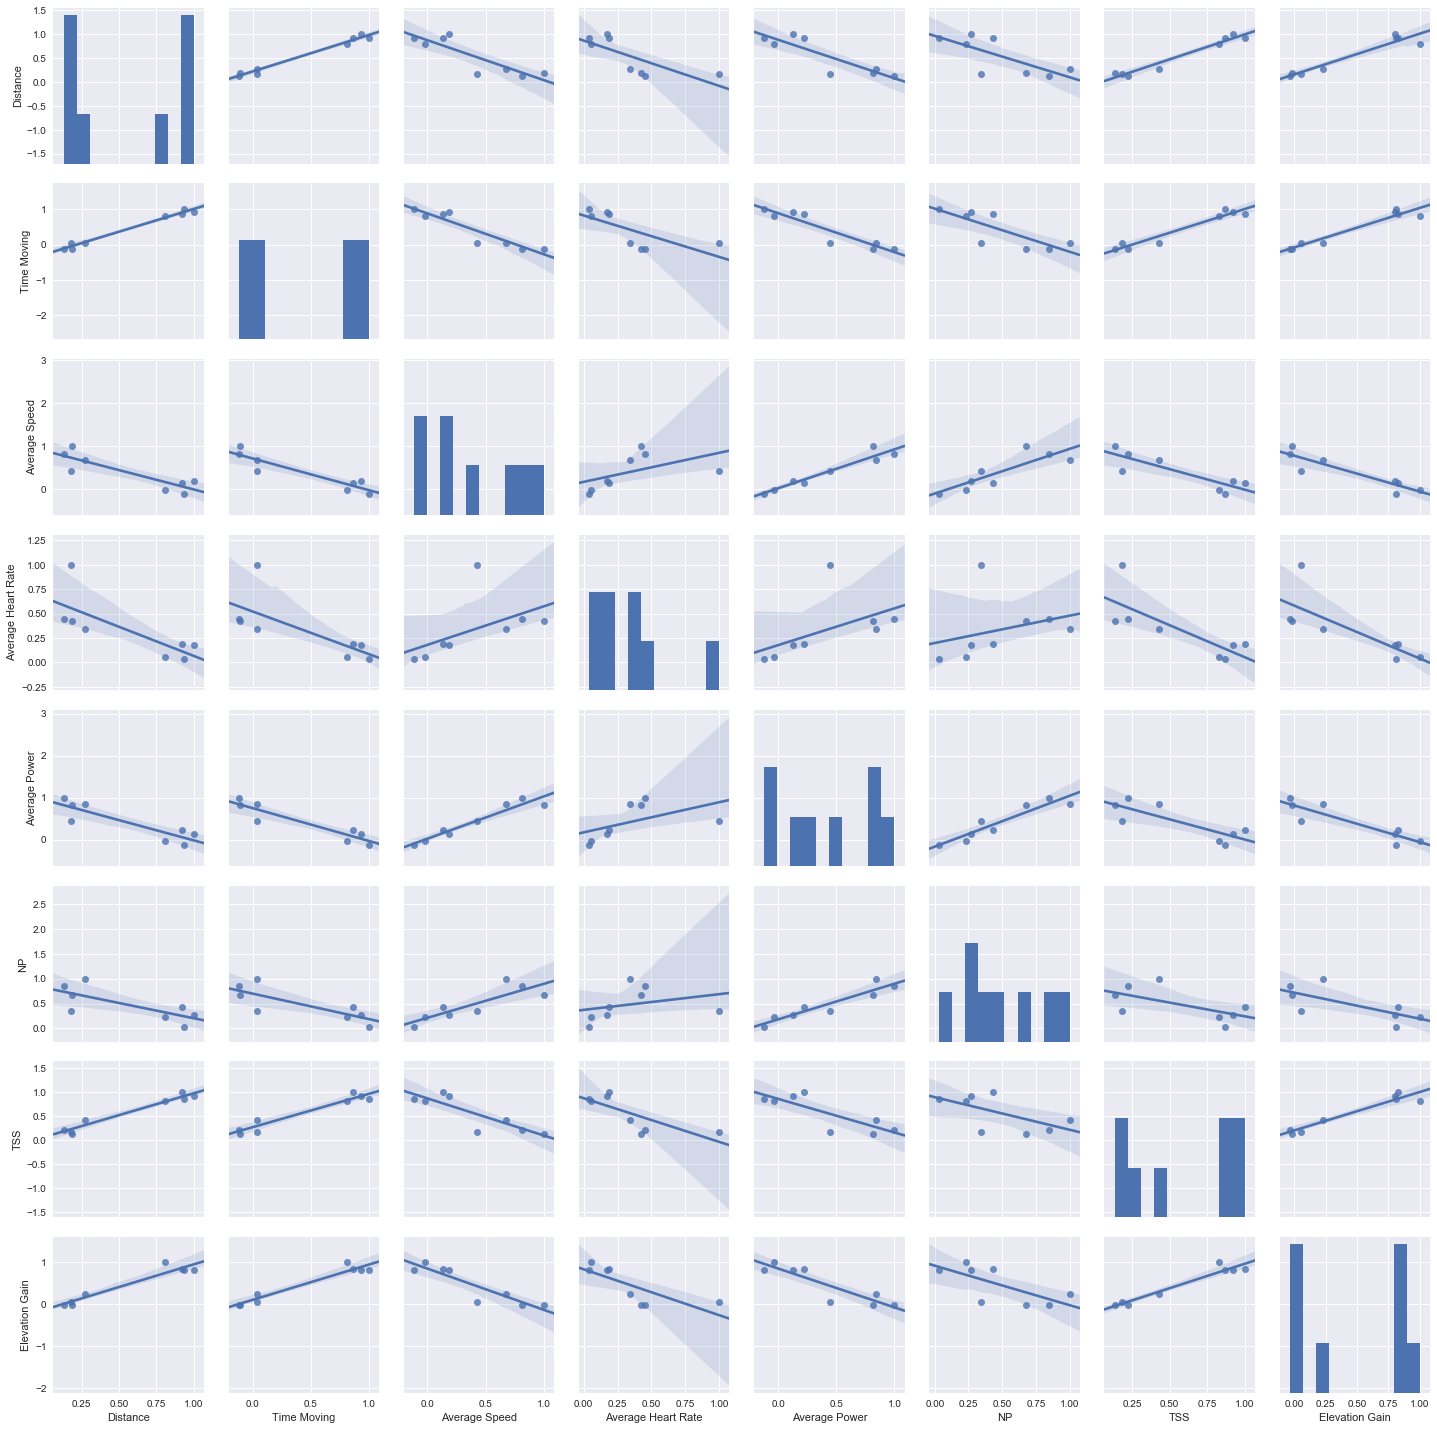

In [16]:
import seaborn as sns
#plotting pairplot for correlation and plotting with heatmap 
sns.pairplot(que3.corr(),kind='reg')
#sns.heatmap(que3.corr())

In [17]:
que3.corr()

,Distance,Time Moving,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
Distance,1.000000,0.933567,0.187429,0.175294,0.129226,0.270715,0.922541,0.805486
Time Moving,0.933567,1.000000,-0.112951,0.039877,-0.119617,0.034142,0.866093,0.811409
Average Speed,0.187429,-0.112951,1.000000,0.422165,0.814403,0.674857,0.134054,-0.016160
Average Heart Rate,0.175294,0.039877,0.422165,1.000000,0.448912,0.343179,0.183747,0.050890
Average Power,0.129226,-0.119617,0.814403,0.448912,1.000000,0.844487,0.225290,-0.035987
NP,0.270715,0.034142,0.674857,0.343179,0.844487,1.000000,0.432286,0.229933
TSS,0.922541,0.866093,0.134054,0.183747,0.225290,0.432286,1.000000,0.828928
Elevation Gain,0.805486,0.811409,-0.016160,0.050890,-0.035987,0.229933,0.828928,1.000000


### From the correlation : - 

* With respect to distance : higly correlated with moving_time followed by TSS and after Elevation Gain.
* With respect to moving_time : correlated with distance  followed by TSS and Elevation Gain.
* With respect to average speed : higly correlated with Average Power followed by average heart rate.
* With respect to average_heartrate : higly crrelated with Average Speed followed by Average heartrate.
* With respect to average power :  higly correlated with NP followed by Average Speed.
* With respect to NP : higly correlated with Average Power.
* With respect to TSS : higly correlated with distance followed by moving_time and Elevatio Gain.
* With respect to Elevation gain : higly correlated with TSS followed by moving_time and distance.

### 4.Some of the rides are designated as "Race" in the `workout_type` field, these are where I am racing and you might expect that these would be the most challenging rides.  Normalised Power (NP) is a good measure of how hard a ride is.  Explore the values of `NP` for races vs the overall set of rides to see if this hypothesis is supported (use graphs and summary statistics).  Are races more challenging than rides in general? 

* groupby 'workout_type'

In [18]:
testque4 = new_df.groupby('workout_type')

In [19]:
testque4_race,testque4_ride = testque4.get_group('Race'),testque4.get_group('Ride')
testque4_workout = testque4.get_group('Workout')

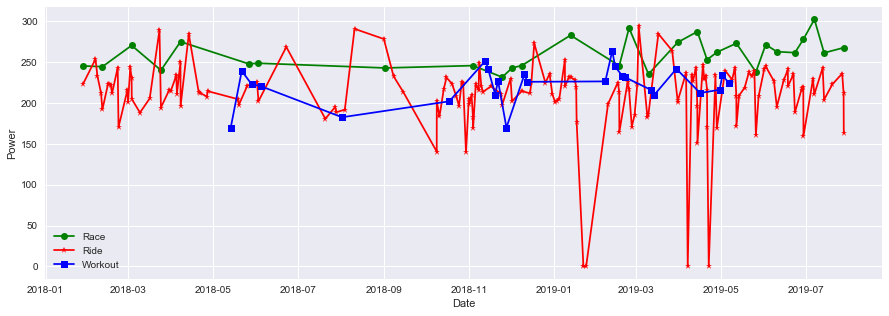

In [20]:
plt.figure(figsize=(15,5))
d1 = plt.plot(testque4_race.NP,color='green',marker = "o")
d2 = plt.plot(testque4_ride.NP,color='red',marker='*')
d3 = plt.plot(testque4_workout.NP,color='blue',marker = 's')
plt.ylabel('Power')
plt.xlabel('Date')
plt.legend((d1[0],d2[0],d3[0]),('Race','Ride','Workout'))

**From the graph we can see that the race are most challenging ride.**

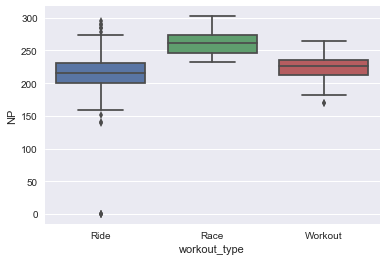

In [21]:
sns.boxplot(x='workout_type',y='NP',data=new_df)

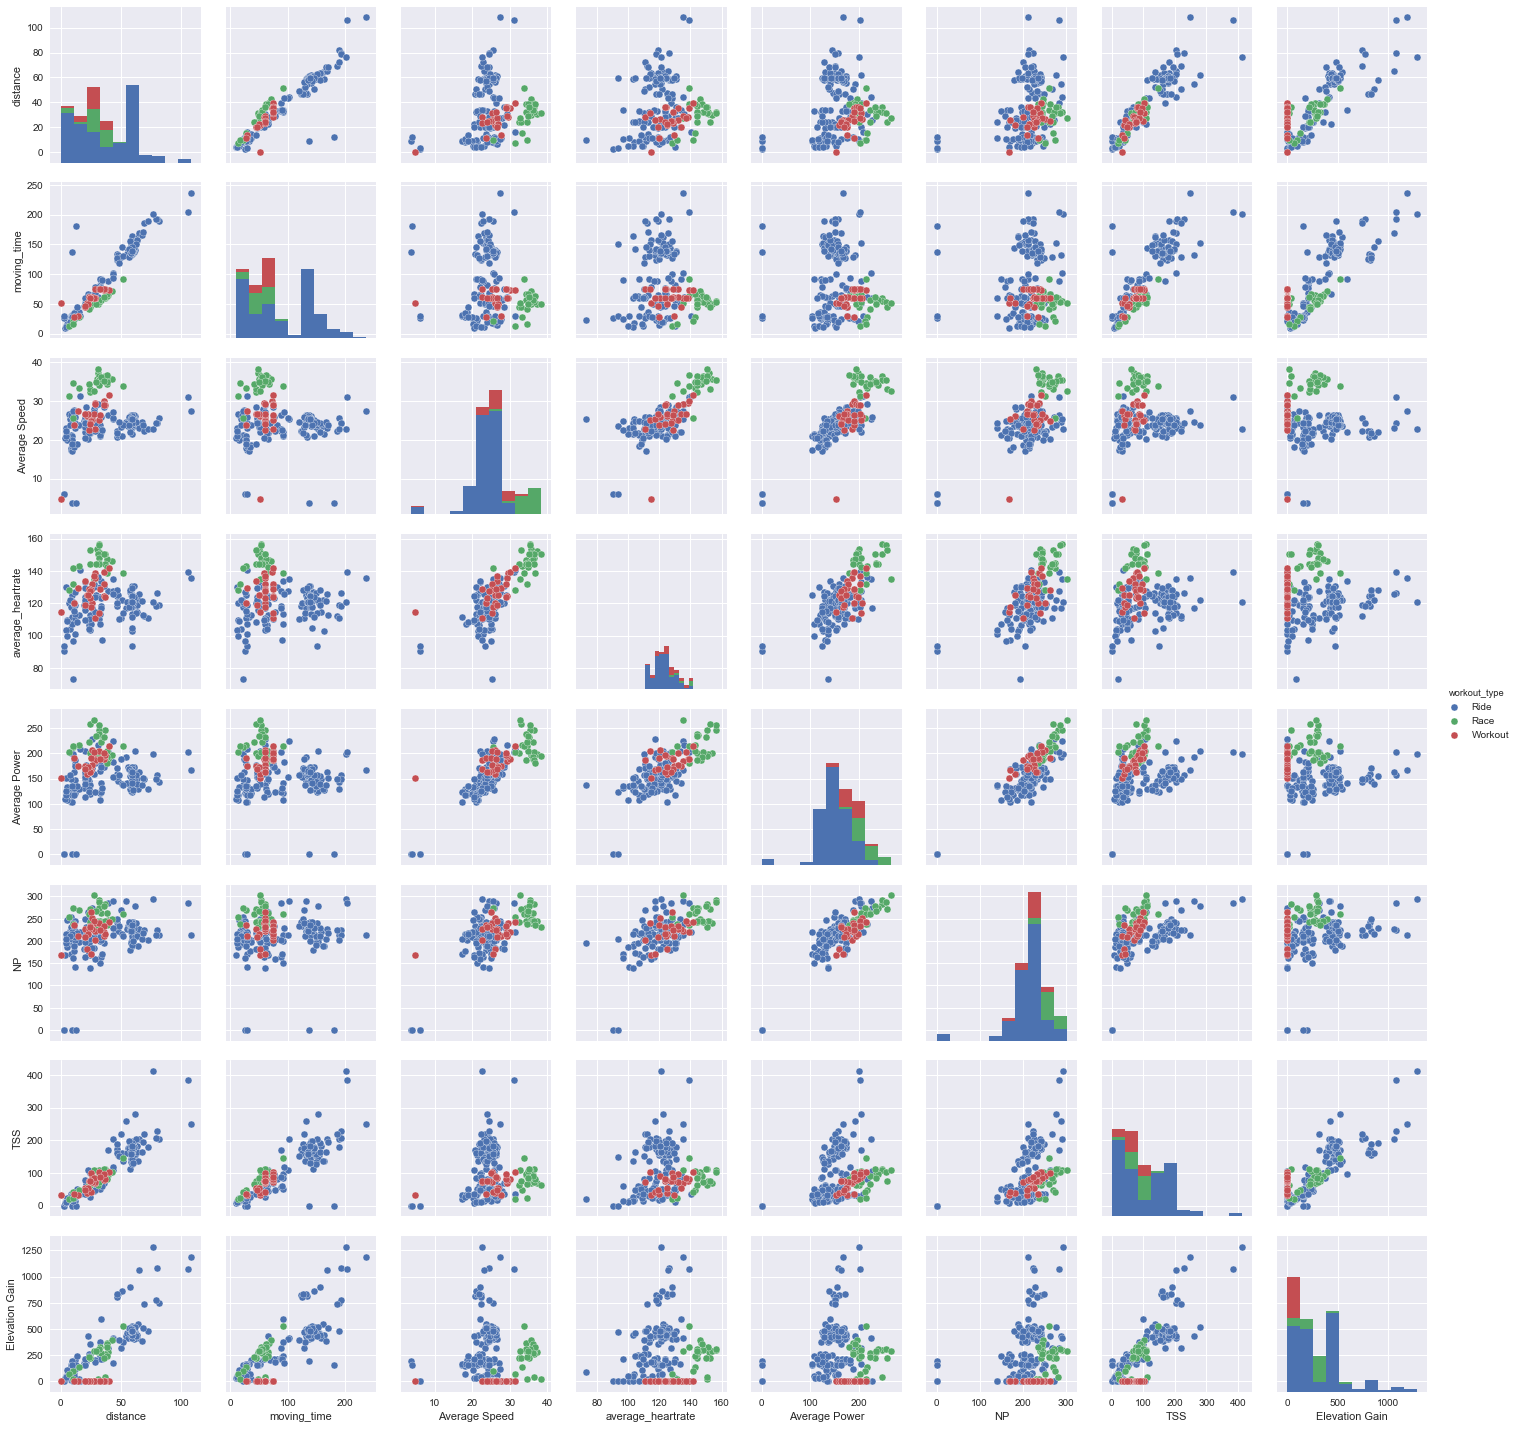

In [22]:
sns.pairplot(new_df[["distance","workout_type","moving_time","Average Speed","average_heartrate","Average Power","NP","TSS","Elevation Gain"]],hue = 'workout_type')

#### From pairplot : 
* Race increases with increase in average speed
* Race and Ride increases with increase in average_heartrate
* Ride increases with increase in moving_time
* Ride increses with increse in TSS
* Ride increses with increse in NP

In [23]:
from scipy.stats import ttest_ind
print('check hypothesisw using NP value')
race_mean,ride_mean = testque4_race.NP.mean(),testque4_ride.NP.mean()
print("race mean value:",race_mean,"ride mean value:",ride_mean)
race_std,ride_std = testque4_race.NP.std(),testque4_ride.NP.std()
print("race std value:",race_std,"ride std value:",ride_std)
t,pval = ttest_ind(testque4_race.NP,testque4_ride.NP)
print("p-value :  ",pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

check hypothesisw using NP value
race mean value: 259.65910344827586 ride mean value: 210.70189032258065
race std value: 18.50398867299547 ride std value: 44.08804084355482
p-value :   1.9912155126641322e-08
we reject null hypothesis so we can say that races are more challenging than rides


* As we can say from the upper line and boxplot the NP is higher for the Race then Ride and Workout.
* Hypothesis check for NP using scipy module and got a result of p value is 1.99e-08 so its less than 0.05 and we reject null hypothesis so we can say that races are more challenging than rides.

### 5.It is useful to see a summary of rides over the year. Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

In [24]:
#new df for perform que 5
que5 = new_df[['distance','TSS','Average Speed']]
display(que5.head())

,distance,TSS,Average Speed
2018-01-27 19:39:49+00:00,7.6,20.2257,26.0234
2018-01-27 20:01:32+00:00,38.6,94.5787,34.4380
2018-02-05 21:06:42+00:00,24.3,98.3269,22.2417
2018-02-07 06:59:05+00:00,47.1,171.0780,20.7841
2018-02-09 19:18:03+00:00,59.8,147.7970,25.6585


In [25]:
#make new column of date where we can sum distance data by month 
import datetime
que5['date'] = ''
for i in range(len(que5['distance'])):
    que5['date'][i] = que5.index[i].strftime("%y-%b")

In [26]:
que5.head()

,distance,TSS,Average Speed,date
2018-01-27 19:39:49+00:00,7.6,20.2257,26.0234,18-Jan
2018-01-27 20:01:32+00:00,38.6,94.5787,34.4380,18-Jan
2018-02-05 21:06:42+00:00,24.3,98.3269,22.2417,18-Feb
2018-02-07 06:59:05+00:00,47.1,171.0780,20.7841,18-Feb
2018-02-09 19:18:03+00:00,59.8,147.7970,25.6585,18-Feb


Blue : TSS , Green : Distance , Red : Average Speed 


Text(0,0.5,'Distance, Average Speed, TSS')

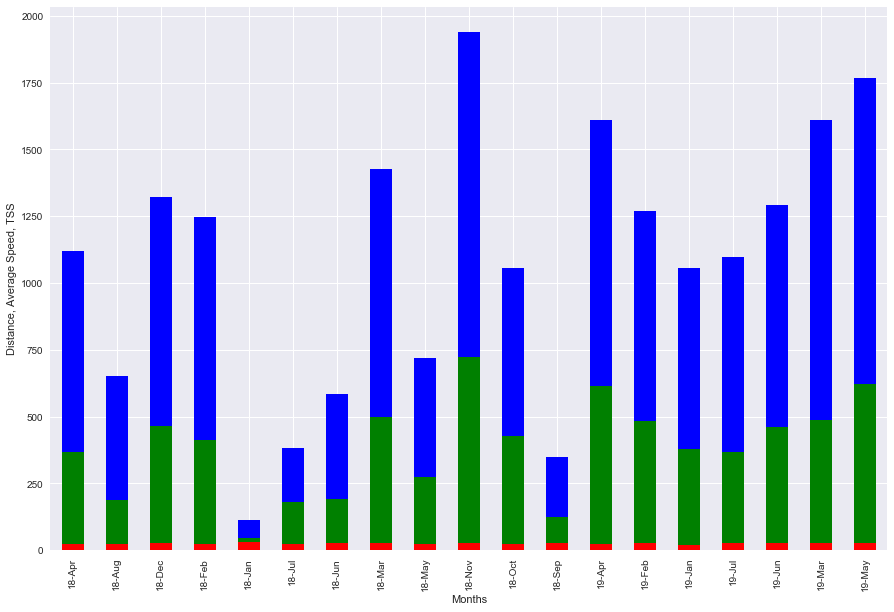

In [36]:
plt.figure(figsize=(15,10))
a=que5.groupby('date')['TSS'].sum().plot.bar(color='blue')
b=que5.groupby('date')['distance'].sum().plot.bar(color='green')
c=que5.groupby('date')['Average Speed'].mean().plot.bar(color='red')
print('Blue : TSS , Green : Distance , Red : Average Speed ')
plt.xlabel("Months")
plt.ylabel("Distance, Average Speed, TSS")

**plot that summarises the number of km ridden each month over the period of the data, Overlay this with the sum of the Training Stress Score and the average of the Average Speed to generate an overall summary of activity.**

# Challenge
### 1. What leads to more kudos? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe.

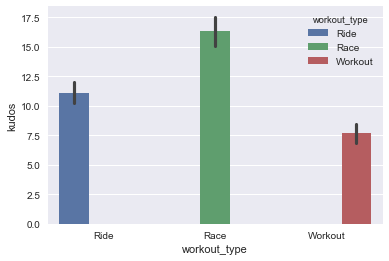

In [28]:
#what leads to more kudos
import seaborn as sns
kudos_check = new_df[["workout_type","kudos","distance","moving_time"]]
sns.barplot(x="workout_type", y="kudos", hue="workout_type", data=kudos_check)
#well we can see from the boxplot as well as bar chart that Race workout_type leads to More Kudos

In [29]:
ch1 = new_df[["distance","workout_type","kudos","moving_time","Average Speed","average_heartrate","Average Power","NP","TSS","Elevation Gain"]]
display(ch1.corr())
ch1_test = ch1[['kudos','distance','moving_time','workout_type']]
display(ch1_test.corr())

,distance,kudos,moving_time,Average Speed,average_heartrate,Average Power,NP,TSS,Elevation Gain
distance,1.000000,0.753808,0.939383,0.187363,0.114595,0.129199,0.270703,0.922565,0.805468
kudos,0.753808,1.000000,0.663127,0.393050,0.387071,0.264819,0.353419,0.694799,0.637602
moving_time,0.939383,0.663127,1.000000,-0.103484,-0.048611,-0.109838,0.044431,0.871368,0.813146
Average Speed,0.187363,0.393050,-0.103484,1.000000,0.742388,0.814403,0.674857,0.134054,-0.016160
average_heartrate,0.114595,0.387071,-0.048611,0.742388,1.000000,0.692413,0.593091,0.113775,0.071553
Average Power,0.129199,0.264819,-0.109838,0.814403,0.692413,1.000000,0.844487,0.225290,-0.035987
NP,0.270703,0.353419,0.044431,0.674857,0.593091,0.844487,1.000000,0.432286,0.229933
TSS,0.922565,0.694799,0.871368,0.134054,0.113775,0.225290,0.432286,1.000000,0.828928
Elevation Gain,0.805468,0.637602,0.813146,-0.016160,0.071553,-0.035987,0.229933,0.828928,1.000000


,kudos,distance,moving_time
kudos,1.000000,0.753808,0.663127
distance,0.753808,1.000000,0.939383
moving_time,0.663127,0.939383,1.000000


* It can be notice that from the chart that Race workout_type leads to More Kudos.
* correltion matrix1 we can see that 'distance' explains the more about kudos than 'moving_time' and 'TSS' and on second correlation check kudos relation with 'distance' and it can be said that the distance value makes effect of kudos value.

# Challenge
### 2.Generate another summary graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown. So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

In [41]:
ch2 = new_df[["kudos","distance","moving_time",'TSS','Average Speed','date']]
ch2.head()

,kudos,distance,moving_time,TSS,Average Speed,date
2018-01-27 19:39:49+00:00,4,7.6,17,20.2257,26.0234,01/28/18
2018-01-27 20:01:32+00:00,19,38.6,67,94.5787,34.4380,01/28/18
2018-02-05 21:06:42+00:00,6,24.3,65,98.3269,22.2417,02/06/18
2018-02-07 06:59:05+00:00,10,47.1,134,171.0780,20.7841,02/07/18
2018-02-09 19:18:03+00:00,22,59.8,139,147.7970,25.6585,02/10/18


In [44]:
import datetime
ch2['date'] = ''
for i in range(len(que5['distance'])):
    ch2['date'][i] = ch2.index[i].strftime("%y-%b")

In [45]:
testch = pd.DataFrame()
testch = ch2.groupby('date')['distance','TSS'].sum()
testch["Average Speed"] = ch2.set_index('date').groupby('date')['Average Speed'].mean()
testch.head()

,distance,TSS,Average Speed
date,,,
18-Apr,368.4,1119.6003,22.733291
18-Aug,186.7,650.2351,24.820900
18-Dec,463.5,1320.9536,26.542742
18-Feb,411.9,1247.0274,23.835350
18-Jan,46.2,114.8044,30.230700


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

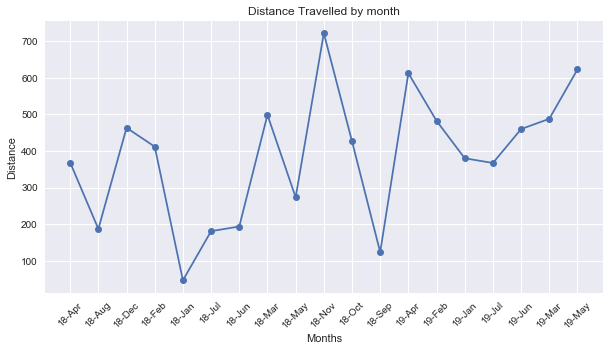

In [46]:
plt.figure(figsize = (10,5))
plt.plot(testch.index, testch["distance"], marker = 'o')
plt.title("Distance Travelled by month")
plt.xlabel("Months")
plt.ylabel("Distance")
plt.xticks(rotation=45)

**Distance travel is high in month November 2018**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

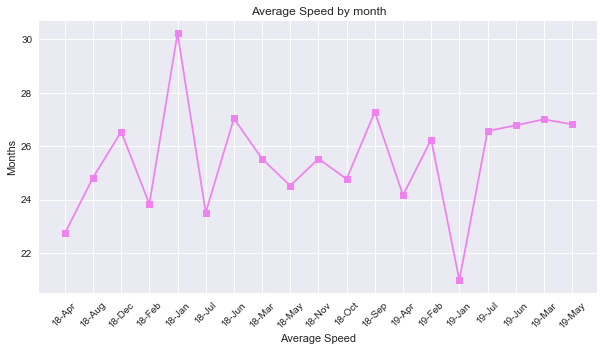

In [47]:
plt.figure(figsize = (10,5))
plt.plot(testch.index, testch["Average Speed"], marker = 's',color='violet')
plt.title("Average Speed by month")
plt.xlabel("Average Speed")
plt.ylabel("Months")
plt.xticks(rotation=45)

**Average Speed is higher for month jan 2018**